In [1]:
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from keras.layers import Conv2D, MaxPooling2D,Flatten
np.random.seed(107629491)
minibatch = 200
epochs = 50

C:\Users\srinivab\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [9 0 0 ... 3 0 5]


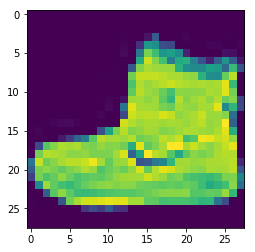

In [2]:
class LoadDataModule(object):
    def __init__(self):
        self.DIR = './'
        pass
    
    # Returns images and labels corresponding for training and testing. Default mode is train. 
    # For retrieving test data pass mode as 'test' in function call.
    def load(self, mode = 'train'):
        label_filename = mode + '_labels'
        image_filename = mode + '_images'
        label_zip = self.DIR + label_filename + '.zip'
        image_zip = self.DIR + image_filename + '.zip'
        with ZipFile(label_zip, 'r') as lblzip:
            labels = np.frombuffer(lblzip.read(label_filename), dtype=np.uint8, offset=8)
        with ZipFile(image_zip, 'r') as imgzip:
            images = np.frombuffer(imgzip.read(image_filename), dtype=np.uint8, offset=16).reshape(len(labels), 784)
        print(images,labels)
        return images, labels
ld = LoadDataModule()
images,labels = ld.load('train')
plt.imshow(np.reshape(images[0,:],(28,28)))

In [4]:
#print the model architecture
model = models.Sequential()
model.add(layers.Dense(784, activation = "tanh",input_shape=(784, )))
model.add(layers.Dense(512, activation = "sigmoid"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
#from keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#from IPython.display import Image,SVG
#Image(filename='model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,069,670
Trainable params: 1,069,670
Non-trainable params: 0
_________________________________________________________________


In [5]:
train_x = images[:48000]
test_x = images[48000:]
target_train_y = labels[:48000]
target_test_y = labels[48000:]

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255

train_y = to_categorical(target_train_y)
test_y = to_categorical(target_test_y)

In [6]:
train_y.shape

(48000, 10)

In [7]:
import time
t = time.localtime(time.time())
timeStamp = str(t.tm_year) + '-' + str(t.tm_mon) + '-' + str(t.tm_mday) + '--' + str(t.tm_hour) + '-'+str(t.tm_min) + '-'+str(t.tm_sec)
timeStamp
tBoard = TensorBoard(log_dir='Graph/{}'.format(timeStamp))
model.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 #loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"]
)
result = model.fit(train_x,train_y,
                   batch_size=minibatch,
                   epochs=epochs,
                   validation_split = 0.2,
                   shuffle=True,
                   callbacks=[tBoard])

Train on 38400 samples, validate on 9600 samples
Epoch 1/50
38400/38400 [==============================] - 8s 215us/step - loss: 0.5937 - acc: 0.7877 - val_loss: 0.4671 - val_acc: 0.8307
Epoch 2/50
38400/38400 [==============================] - 7s 189us/step - loss: 0.4057 - acc: 0.8526 - val_loss: 0.3901 - val_acc: 0.8619
Epoch 3/50
38400/38400 [==============================] - 8s 204us/step - loss: 0.3704 - acc: 0.8646 - val_loss: 0.3831 - val_acc: 0.8645
Epoch 4/50
38400/38400 [==============================] - 7s 195us/step - loss: 0.3490 - acc: 0.8705 - val_loss: 0.3844 - val_acc: 0.8609
Epoch 5/50
38400/38400 [==============================] - 8s 207us/step - loss: 0.3259 - acc: 0.8789 - val_loss: 0.3492 - val_acc: 0.8716
Epoch 6/50
38400/38400 [==============================] - 8s 196us/step - loss: 0.3094 - acc: 0.8846 - val_loss: 0.3421 - val_acc: 0.8758
Epoch 7/50
38400/38400 [==============================] - 8s 205us/step - loss: 0.2901 - acc: 0.8921 - val_loss: 0.3153 - v

In [8]:
print(result.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


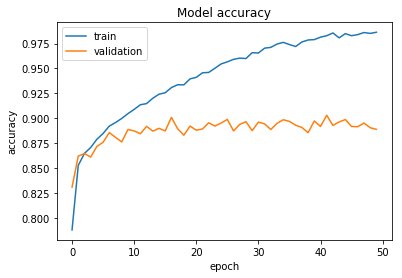

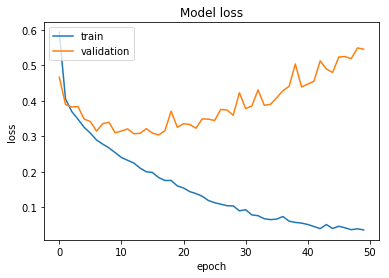

In [9]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
 test_result = model.evaluate(test_x, test_y, verbose=0)

In [11]:
print('Classification loss:', test_result[0])
print('Test Accuracy:', test_result[1])

Classification loss: 0.5589288444047172
Test Accuracy: 0.8840833333333333


In [12]:
##### Test data evaluation
images,labels = ld.load('test')
test_x = images
target_test_y = labels
test_x = test_x.astype('float32')
test_x = test_x / 255
test_y = to_categorical(target_test_y)

y_pred = model.predict(test_x)
y_pred = np.argmax(np.round(y_pred),axis=1)
from sklearn.metrics import classification_report
print(classification_report(target_test_y, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [9 2 1 ... 8 1 5]
             precision    recall  f1-score   support

          0       0.81      0.84      0.82      1000
          1       0.96      0.99      0.97      1000
          2       0.75      0.84      0.79      1000
          3       0.91      0.84      0.87      1000
          4       0.86      0.74      0.80      1000
          5       0.99      0.96      0.97      1000
          6       0.71      0.73      0.72      1000
          7       0.91      0.98      0.94      1000
          8       0.98      0.97      0.97      1000
          9       0.98      0.93      0.95      1000

avg / total       0.88      0.88      0.88     10000



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test_y, y_pred)

In [14]:
print(cm)

[[840   6  19  15   3   0 114   0   3   0]
 [  3 986   0   7   0   0   3   0   1   0]
 [ 19   1 841  11  45   0  83   0   0   0]
 [ 37  29  28 841  28   0  35   0   2   0]
 [ 10   1 150  25 743   0  68   0   3   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [121   6  74  22  38   0 733   0   6   0]
 [  0   0   0   0   0   7   0 984   0   9]
 [  7   2   8   4   2   2   3   5 967   0]
 [  1   0   0   1   0   5   0  68   0 925]]


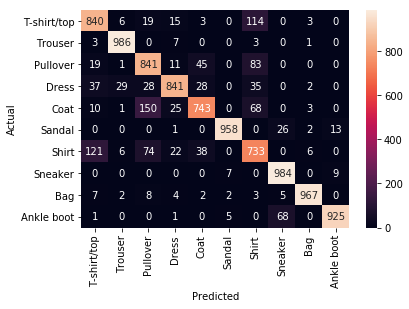

In [15]:
y_classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',xticklabels=y_classes, yticklabels=y_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()